
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

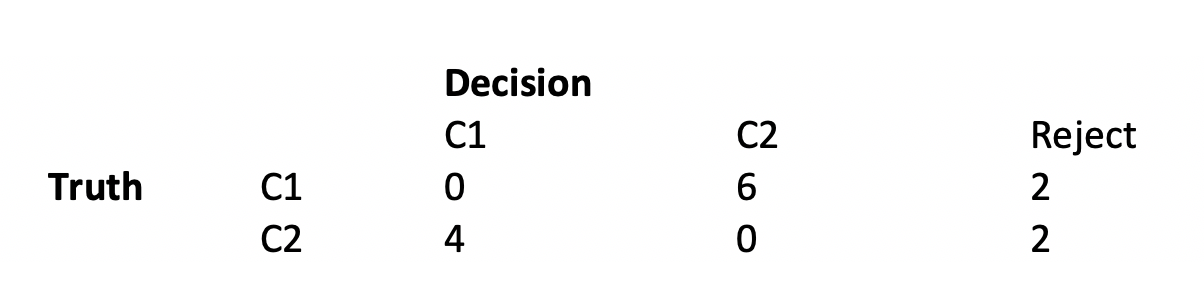

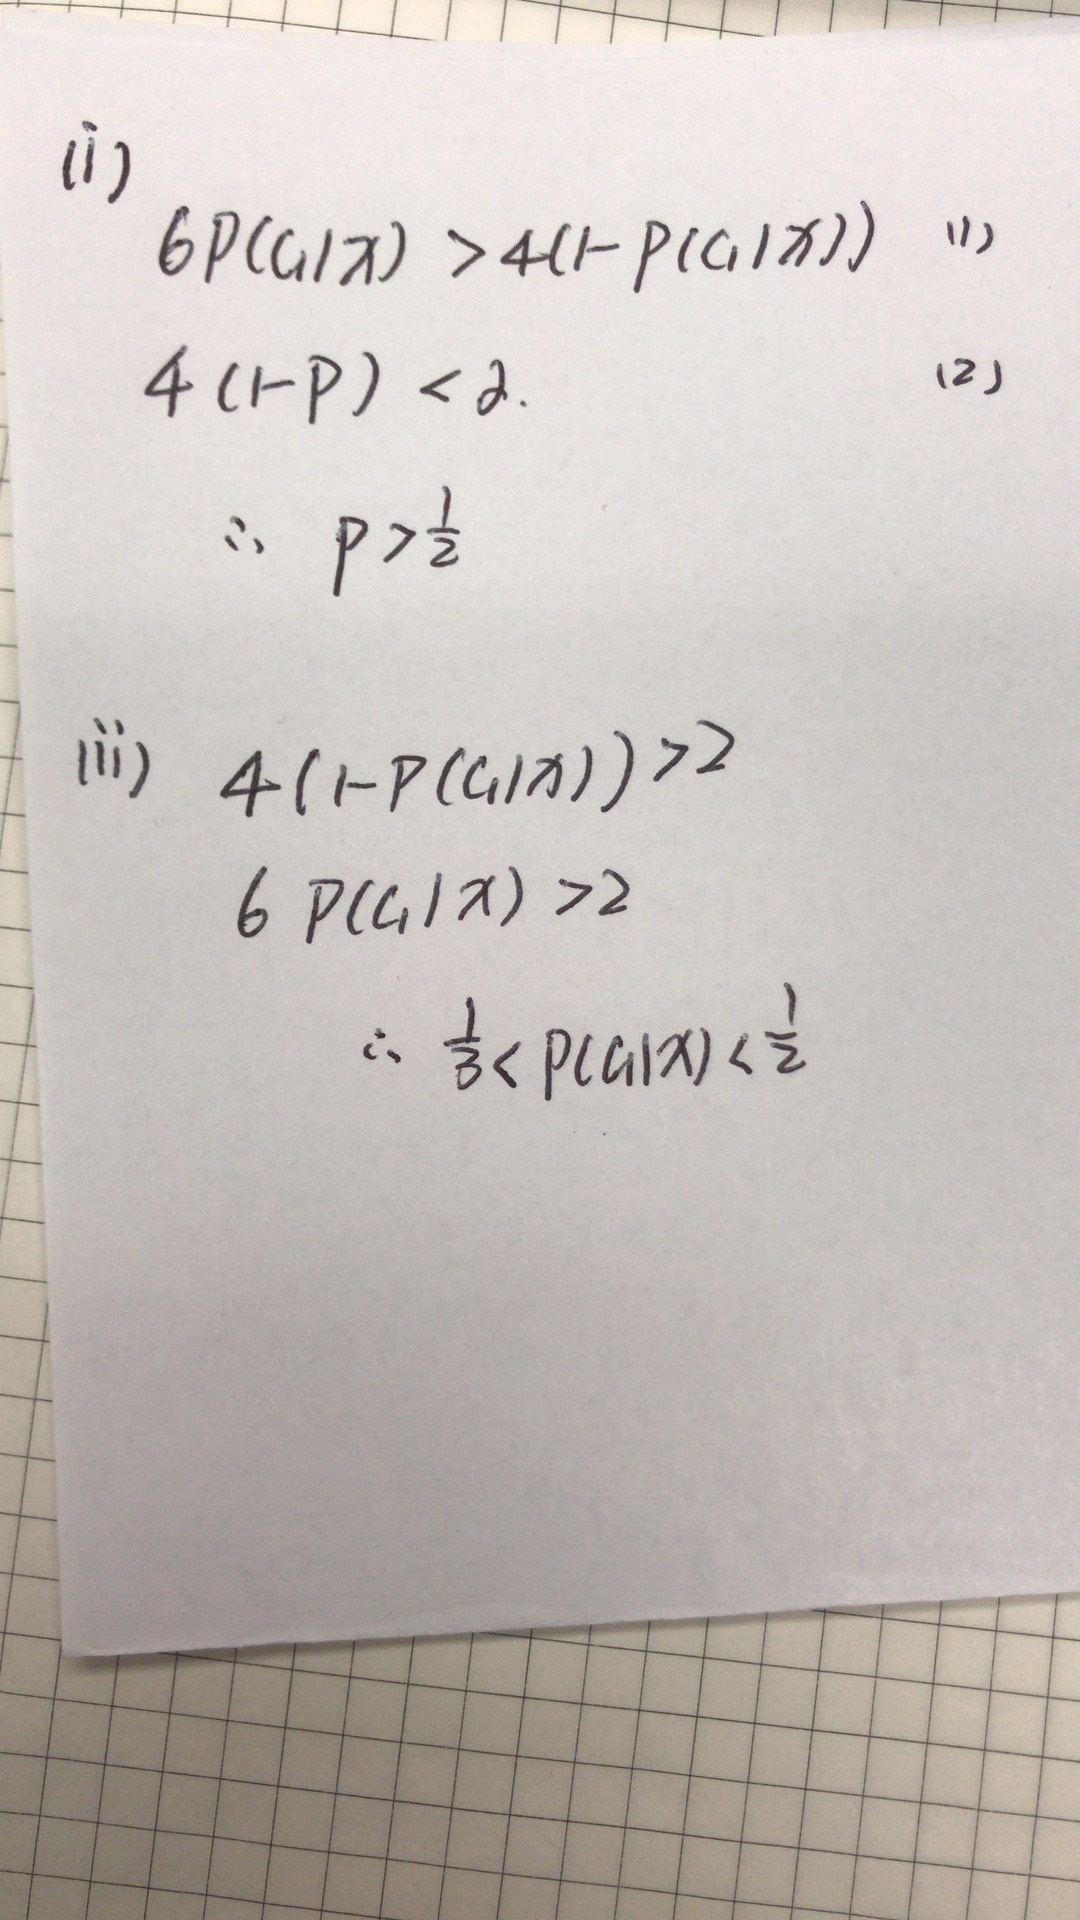

In [48]:
from IPython.display import Image
Image(filename='graph1.jpg')

## Answer

# Question 2 - Concepts (15 pts)

##### 1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart?  

The lift curve can determine how effectively we can get a large portion of the responses by selecting a small number of data points. It shows how likely we can capture positive responses than we use a random sample.


##### How is it similar to an ROC curve and in what way is it different?

The ROC curve is similar to Lift curve since they both provide a comparison between classification models. Lift is dependent on total response rate of the population. Hence, if the response rate changes, the same model will have a different lift chart. However, ROC curve is independent of the response rate because its two axiss will change on similar scale when the response rate changes.

##### Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)

In the marketing setting, Lift is prefered over the AUROC when the company wants to know how many customers to reach out to get the maximum response rate. Using the Lift, the company can know reaching out how many percentage of customers can get how many percentage of total responses.

##### 2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

Calibrating a classifier is to make the output of the predict probabilities directly interpret confidence level. For example, before calibration, the training set shows that the posterior probability is 85%, whereas the true posterior probability might be 80%. After we calibrate our model, the class has posterior probability is 0.8, about 80% should actually belong to the positive class.

## Answer

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [4]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11787, 784) (11787,) (1996, 784) (1996,)


1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

In [5]:
#8--0， 9--1
lr=LogisticRegression()
nb=GaussianNB()
mlp=MLPClassifier()
pred_lr=lr.fit(X_train,y_train).predict_proba(X_test)
pred_nb=nb.fit(X_train,y_train).predict_proba(X_test)
pred_mlp=mlp.fit(X_train,y_train).predict_proba(X_test)

In [6]:
#posterior probability obtained by logistic regression
pred_lr

array([[3.14639263e-04, 9.99685361e-01],
       [5.60330924e-01, 4.39669076e-01],
       [9.99993710e-01, 6.29001519e-06],
       ...,
       [3.79584558e-03, 9.96204154e-01],
       [9.59867385e-02, 9.04013262e-01],
       [6.23378895e-04, 9.99376621e-01]])

In [7]:
#posterior probability obtained by naive bayes
pred_nb

array([[0.00000000e+000, 1.00000000e+000],
       [7.09900774e-076, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [3.43264913e-118, 1.00000000e+000],
       [2.85995088e-032, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000]])

In [8]:
#posterior probability obtained by MLP
pred_mlp

array([[1.46837875e-09, 9.99999999e-01],
       [6.11891810e-05, 9.99938811e-01],
       [9.99999990e-01, 1.04124937e-08],
       ...,
       [1.20471839e-06, 9.99998795e-01],
       [3.49601651e-04, 9.99650398e-01],
       [1.70789783e-06, 9.99998292e-01]])

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)


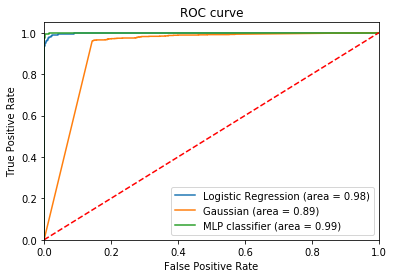

In [9]:
log_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
gaus_roc_auc = roc_auc_score(y_test, nb.predict(X_test))
mlp_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, pred_lr[:,1])
fpr_gaus, tpr_gaus, thresholds_gaus = roc_curve(y_test, pred_nb[:,1])
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, pred_mlp[:,1])
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(fpr_gaus, tpr_gaus, label='Gaussian (area = %0.2f)' % gaus_roc_auc)
plt.plot(fpr_mlp, tpr_mlp, label='MLP classifier (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

In [10]:
# 3
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(lr.score(X_test, y_test)))
print('Accuracy of Gaussian on test set: {:.4f}'.format(nb.score(X_test, y_test)))
print('Accuracy of MLP classifier on test set: {:.4f}'.format(mlp.score(X_test, y_test)))
print('Area under ROC curve for logistic regression model: {:.4f}'.format(log_roc_auc))
print('Area under ROC curve for Gaussion model: {:.4f}'.format(gaus_roc_auc))
print('Area under ROC curve for MLP classifier model: {:.4f}'.format(mlp_roc_auc))

Accuracy of logistic regression classifier on test set: 0.9815
Accuracy of Gaussian on test set: 0.8878
Accuracy of MLP classifier on test set: 0.9950
Area under ROC curve for logistic regression model: 0.9814
Area under ROC curve for Gaussion model: 0.8892
Area under ROC curve for MLP classifier model: 0.9949


4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

Text(0.5,1,'MLP')

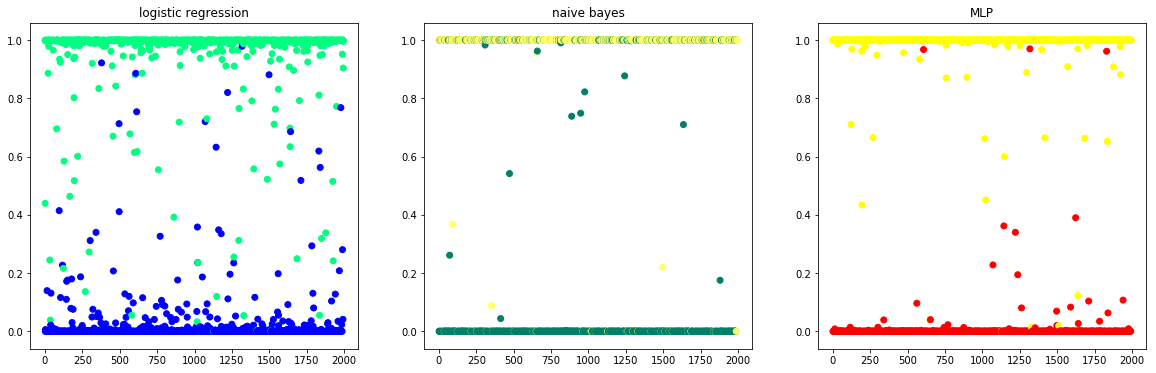

In [44]:
f = plt.figure(figsize=(20,6))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
# Logistic Regression
ax.scatter(range(len(pred_lr)),pred_lr[:,1],c=y_test,cmap=plt.cm.winter)
# Nb
ax2.scatter(range(len(pred_nb)),pred_nb[:,1],c=y_test,cmap=plt.cm.summer)
# MLP
ax3.scatter(range(len(pred_mlp)),pred_mlp[:,1],c=y_test,cmap=plt.cm.autumn)
ax.set_title('logistic regression')
ax2.set_title('naive bayes')
ax3.set_title('MLP')

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

The majority of the misclassified points's posterior probability were either classified as 1 or 0, whereas in other model, the posterior probabilities were between 0 and 1. This might result from the method and the assumption underlying Naive Bayes approach.

## Answer

# Question 4 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

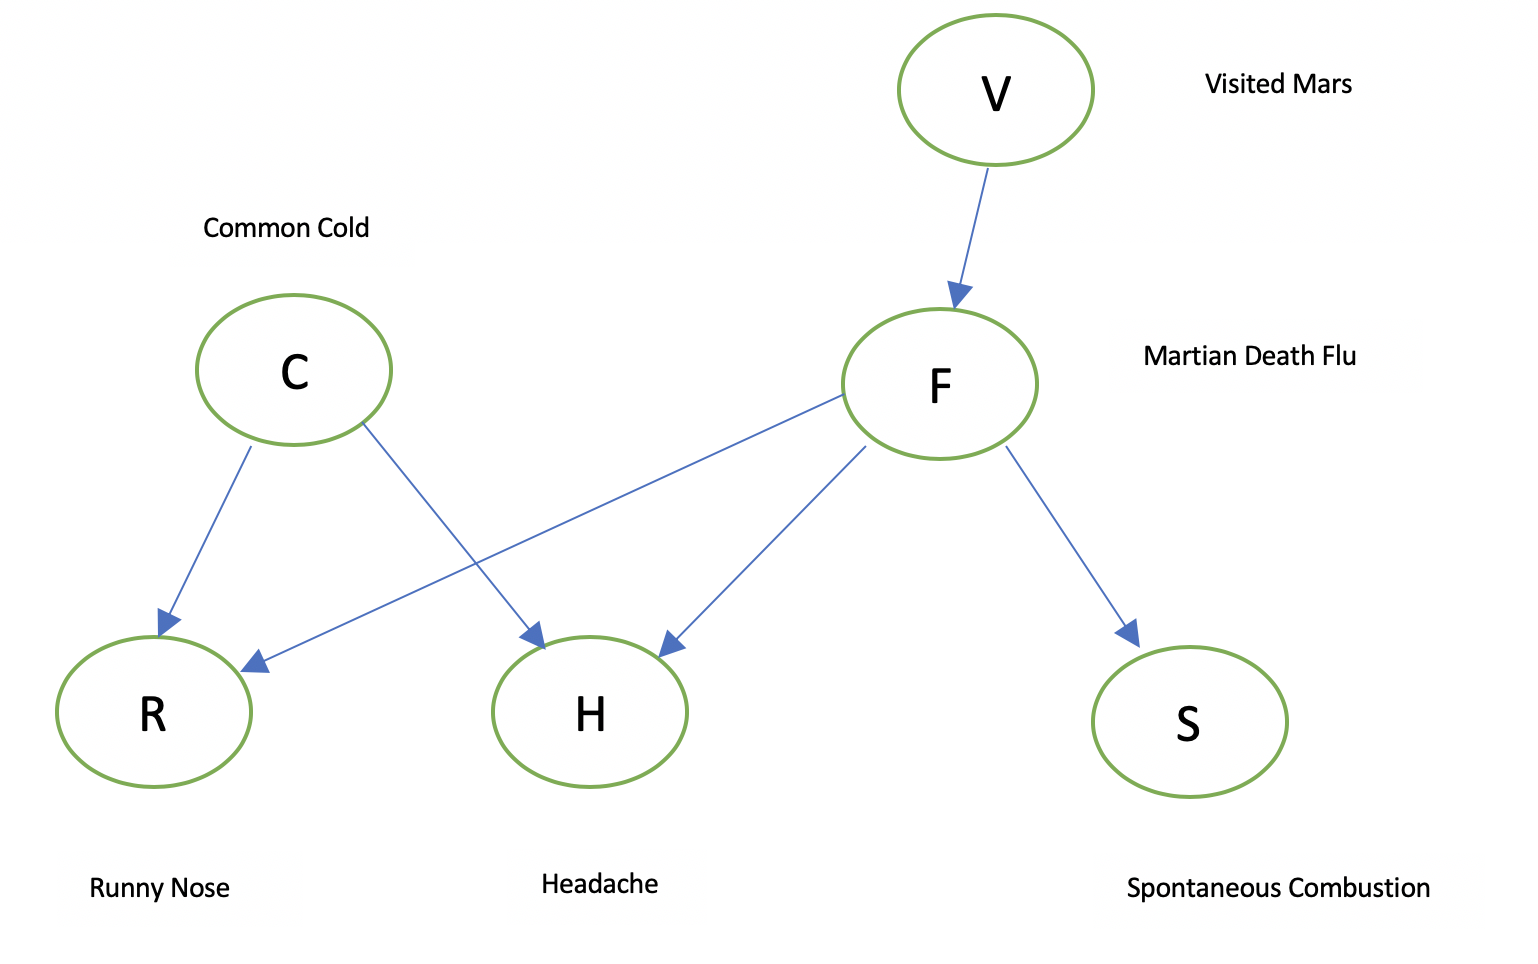

In [12]:
from IPython.display import Image
Image(filename='BBN4.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that the person has headache 

(b) (5 pts) Given that person visited mars, what is the probability that he has runny nose

(c) (5 pts) Given that person visited mars and has a runny nose, what is the probability that the person has common cold and not martian death flu.
